In [48]:
import pandas as pd
import math
from collections import Counter
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import re
pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

In [49]:
def init():
    return pd.read_csv("D://SIAT_IT_Security/anomaly.txt", sep='	')

In [50]:
def work_with_timestamp(file):
    for i, j in enumerate(file["timestamp"].values):
        try:
            if math.isnan(float(j)):
#                 print(True)
                file.drop(i, inplace=True)
        except:
            file.drop(i, inplace=True)
    file["timestamp"] = file['timestamp'].astype("float64")
    file = file.sort_values('timestamp')# 25 20:47:47 CEST 2015
    file = file.reset_index(drop=True)        
    return file

In [51]:
def work_with_strange_attribute(filik):
    filik = filik[filik['cs-url']!='http://--']
    filik = filik.reset_index(drop=True)
    for i, j in enumerate(filik['sc-http-status'].values):
        if str(j) > '9' and j !='standard,' or j == "&nłÉ\x1be}ëa\x81\x06\x19\x1f\x83â8ÓÖÂ†ÇoÂšceŻ'-\x01>\x17Üť*\x13¨ůÖĎ4\x15BK€ńn‡ŚŤZ\x83Xé\x06?ä\x05r»0áž÷T°\x18§BuŮ\x98" or j == "\x17 ©|\x04ůýÖ…¤ÉĐ&Đň+?ĺ!Ď,t=Ł…#0ĘÖ H!�ţ\x17„ą9oTµbë ‘Ž'¬-z#x‰&ß\x04Ą’[P\x81ľ—\\\x1dŞ“(×›WLüŔŃ@" or j == "+°1\x13ńŰüĆ€¸^·" or j == "standard,":
#             print(j)
            filik.drop(i, inplace=True)
    filik = filik.reset_index(drop=True)
    for i, j in enumerate(filik['sc-header-bytes'].values):
        try:
            float(j)
        except:
            filik.drop(i, inplace=True)
    
    filik['sc-header-bytes'] = filik['sc-header-bytes'].astype(float)
        
    filik = filik[filik["sc-header-bytes"] != 49188864.0]# 36556800
    filik = filik[filik["sc-header-bytes"] != 36556800.0]
    filik = filik[filik['sc-bytes']!=8663420.0]
    filik = filik[filik['sc-bytes']!=8244639]
#     file = file[file["c-ip"] == Counter(file['c-ip']).most_common()[0][0]]
    filik['len_of_url'] = filik['cs-url'].apply(lambda x: len(x))
    filik = filik.reset_index(drop=True)
    pattern = ("http://.{1,}?/")
    server = []
    for i, j in enumerate(filik['cs-url']):
        try:
            server.append(re.search(pattern, j)[0][7:-1])
        except:
#             print(j)
            filik.drop(i, inplace=True)
            
    filik = filik.reset_index(drop=True) 
    return filik

In [52]:
def drop_columns(file):
    file.drop(columns="s-port", inplace=True)
    file.drop(columns='sc-http-status', inplace=True)
    file.drop(columns='cs-method', inplace=True)
    file.drop(columns=['s-ip', 'c-ip'], inplace = True)
    file.drop(columns = "cs(User-Agent)", inplace=True)
    file.drop(columns = "cs(Referer)", inplace=True)
    file = file.reset_index(drop=True)
    return file

In [53]:
def processing_http_status(file):
    code_200_206 = 0
    code_204 = 0
    code_3xx = 0
    code_4xx_5xx = 0
    result_200_206 = []
    result_204 = []
    result_3xx = []
    result_4xx_5xx = []

    file = file.reset_index(drop=True)
    for i, j in enumerate(file["sc-http-status"].values):
        try:
            if j == str(200) or j == str(206):
                code_200_206 += 1
                result_200_206.append(code_200_206)
            else:
                result_200_206.append(code_200_206)

            if j == str('204'):
                code_204 += 1
                result_204.append(code_204)
            else:
                result_204.append(code_204)

            if j >= str(3) and j < str(4):
                code_3xx += 1
                result_3xx.append(code_3xx)
            else:
                result_3xx.append(code_3xx)

            if j >= str(4):
                code_4xx_5xx += 1
                result_4xx_5xx.append(code_4xx_5xx)
            else:
                result_4xx_5xx.append(code_4xx_5xx)
        except:
            file.drop(i, inplace=True)
            
    file['code_200_206'] = result_200_206
    file['code_204'] = result_204
    file['code_3xx'] = result_3xx
    file['code_4xx_5xx'] = result_4xx_5xx
    return file

In [54]:
def fill_nan_values(file):
    file["connection.time"] = file["connection.time"].apply(lambda x: float('nan') if x == '-' else x)
    file["request.time"] = file["request.time"].apply(lambda x: float('nan') if x == '-' else x)
    file["response.time"] = file["response.time"].apply(lambda x: float('nan') if x == '-' else x)
    file["close.time"] = file["close.time"].apply(lambda x: float('nan') if x == '-' else x)
    file["idle.time0"] = file["idle.time0"].apply(lambda x: float('nan') if x == '-' else x)
    file["idle.time1"] = file["idle.time1"].apply(lambda x: float('nan') if x == '-' else x)
    file = file.fillna(method='bfill').fillna(method='ffill')
    file["connection.time"] = file["connection.time"].astype("float64")
    file["request.time"] = file["request.time"].astype("float64")
    file["response.time"] = file["response.time"].astype("float64")
    file["close.time"] = file["close.time"].astype("float64")
    file["idle.time0"] = file["idle.time0"].astype("float64")
    file["idle.time1"] = file["idle.time1"].astype("float64")
    return file

In [55]:
def result_recognition(file):
    return pd.DataFrame(file[["timestamp", "cs-url"]]).set_index('timestamp', inplace=True)

In [56]:
# з

def processing_url(file):
    ads = []
    ad = 0
    liverail = []
    liver = 0
    stranger = []
    strange = 0
    caps = []
    cap = 0
    for j in file["cs-url"].values:

        if ('ads.' in j or '.ads' in j) and not 'liverail' in j:
            ad += 1
            ads.append(ad)
        else: 
            ads.append(ad)

        if "liverail" in j:
            liver += 1
            liverail.append(liver)
        else:
            liverail.append(liver)

        if "geo-lb02.w55c.net" in j:
            strange += 1
            stranger.append(strange)
        else:
            stranger.append(strange)

        cap += len(re.findall("[A-Z]", j))
        caps.append(cap)

    file['url_liverail'] = liverail
    file['url_avertisement'] = ads
    file['stranger'] = stranger
    file['caps'] = caps
    return file

In [57]:
def methods_post_get_and_ip(file):
    get = 0
    get_array = []
    post = 0
    post_array = []
    for j in file["cs-method"].values:

        get += 1 if "GET" in j else 0

        post += 1 if "POST" in j else 0

        get_array.append(get)
        post_array.append(post)
    file['get-method'] = get_array
    file['post-method'] = post_array
    a_class = 0
    a_class_array = []
    b_class = 0
    b_class_array = []
    c_class = 0
    c_class_array = []
    privacy_class = 0
    privacy_class_array = []
    for i in file['s-ip']:
        if i[2]=='.' or i[1] == '.':
            a_class += 1
        else:
            if int(i[:3]) < 116:
                a_class += 1
            elif int(i[:3]) < 191:
                b_class += 1
            elif int(i[:3]) < 223:
                c_class += 1
        if "10.0.0.0" > i and i < "10.255.255.255" or "172.16.0.0" < i and i < "172.31.255.255" or \
        "192.168.0.0" < i and i < "192.168.255.255":
            privacy_class += 1
        privacy_class_array.append(privacy_class)
        a_class_array.append(a_class)
        b_class_array.append(b_class)
        c_class_array.append(c_class)
    file["a_class"] = a_class_array
    file["b_class"] = b_class_array
    file["c_class"] = c_class_array
    return file

In [58]:
def mime_type(file):
    mime_text = 0
    mime_text_array = []
    mime_application = 0
    mime_application_array = []
    mime_image = 0
    mime_image_array = []
    for i in file['cs-mime-type'].values:
        if 'text' in i:
            mime_text += 1
        elif 'image' in i:
            mime_image += 1
        elif 'application' in i:
            mime_application += 1

        mime_application_array.append(mime_application)
        mime_text_array.append(mime_text)
        mime_image_array.append(mime_image)
    file["mime_application"] = mime_application_array
    file["mime_text"] = mime_text_array
    file["mime_image"] = mime_image_array
    return file

In [ ]:
most_of_us = Counter(file["cs(User-Agent)"]).most_common()[:5]
print(most_of_us)
most_of_us = np.array(most_of_us)[:, :1].reshape(5,)
def do_column(check_string, series):
    init = 0
    init_array = []
    for i in series:
        init += 1 if check_string in str(i) else 0
        init_array.append(init)
    return init_array
encode = {"user-agent " + str(i): j for i, j in enumerate(most_of_us)}
for i in range(5):
    file['user-agent {}'.format(i)] = do_column(encode["user-agent {}".format(i)], file['cs(User-Agent)'])

In [ ]:
file = drop_columns(file)

In [ ]:
def save(file):
    file = file.reset_index(drop=True)
    file1 = file.drop(columns=['cs-url'])
    file1.to_csv("D://a.csv")
    file1 = pd.read_csv("D://a.csv")
    file1['c-port'] = file1['c-port'].astype(float)
    file1["cs-bytes"] = file1['cs-bytes'].astype(float)
    file1["cs-header-bytes"] = file1['cs-header-bytes'].astype(float)
    # file1.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)
    file1['timestamp'] = file1['Unnamed: 0']
    file1.drop(columns=["user-agent 0", 'cs-mime-type', 'Unnamed: 0', 'user-agent 0'], inplace=True)
    # file1['user-agent 3'][:447] = [0 for i in range(447)]
    # # file1['user-agent 3'][200] = 1
    file1[447:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
    file1[:447].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
    # noise = np.random.normal(0,1,100)
    # file1 = file
    return file1

In [ ]:
file1 = save(file)
j = 0
for i in file1.columns:
    j+=1
    if np.all(file1[i][:447] == 0):
#         print(file[i][100+10*j])
        file1[i][100]=1
        print(file1[i][100], i, j)
Counter(file1['url_liverail'][:447])

In [ ]:
plt.plot(file1[file1.columns[17]][:447])

In [ ]:
from datetime import datetime
import pytz

result_with_less_train_data = pd.read_csv("D://SIAT_IT_Security/result_of_my_work_first_06.csv", index_col="Time")
def draw_full_chart(an_scores, interval_for_labels = 600):
    fig = plt.figure(figsize=(15, 10))
    
    labels = [datetime.fromtimestamp(int(str(t)[:10]),pytz.timezone('Europe/Berlin')).strftime("%Y/%m/%d %H:%M:%S") for t in an_scores.index]
    x = range(len(an_scores))
    plt.plot(x, an_scores)
    plt.xticks(x[::interval_for_labels],labels[::interval_for_labels], rotation=90, rotation_mode='anchor', horizontalalignment ='right')
    plt.grid(color='r', linestyle='-', linewidth=0.3)
    plt.show()    
    return

resik = result_with_less_train_data.sum(axis=1)
resik.index = file['timestamp'][450:]
draw_full_chart(resik)
# resik = result_with_less_train_data[].sum(axis=1)
# resik.index = file['timestamp'][2003:]
# plt.plot([2712 for _ in range(350)], np.linspace(0, 120, 350))
# dot.set_index = [1565786492 for _ in range(9)]
result_with_less_train_data[:2712-447]
plt.plot(file['user-agent 3'])
result_with_less_train_data[:]
re = result_with_less_train_data[result_with_less_train_data>0.73].sum(axis=0)
re

# Something new

In [ ]:
df = pd.read_csv("D://SIAT_IT_Security/normal_data.txt", sep="\t")
df.head()

In [ ]:
df = work_with_timestamp(df)
df = work_with_strange_attribute(df)
df = processing_http_status(df)
df = fill_nan_values(df)
df_support = result_recognition(df)
df = processing_url(df)
df = methods_post_get_and_ip(df)
df = mime_type(df)


In [ ]:
df

In [ ]:
# df = df[df['cs-url']!='http://--']
#     df = df.reset_index(drop=True)
#     for i, j in enumerate(df['sc-http-status']):
#         if str(j) > '9' and j !='standard,' or j == "&nłÉ\x1be}ëa\x81\x06\x19\x1f\x83â8ÓÖÂ†ÇoÂšceŻ'-\x01>\x17Üť*\x13¨ůÖĎ4\x15BK€ńn‡ŚŤZ\x83Xé\x06?ä\x05r»0áž÷T°\x18§BuŮ\x98" or j == "\x17 ©|\x04ůýÖ…¤ÉĐ&Đň+?ĺ!Ď,t=Ł…#0ĘÖ H!�ţ\x17„ą9oTµbë ‘Ž'¬-z#x‰&ß\x04Ą’[P\x81ľ—\\\x1dŞ“(×›WLüŔŃ@" or j == "+°1\x13ńŰüĆ€¸^·" or j == "standard,":
# #             print(j)
#             df.drop(i, inplace=True)
#     file = file.reset_index(drop=True)
#     for i, j in enumerate(file['sc-header-bytes']):
#         try:
#             float(j)
#         except:
#             file.drop(i, inplace=True)
#     file = file.reset_index(drop=True)
#     file['sc-header-bytes'] = file['sc-header-bytes'].astype(float)
        
#     file = file[file["sc-header-bytes"] != 49188864.0]# 36556800
#     file = file[file["sc-header-bytes"] != 36556800.0]
#     file = file[file['sc-bytes']!=8663420.0]
#     file = file[file['sc-bytes']!=8244639]
#     file = file[file["c-ip"] == '10.0.0.45']
#     file['len_of_url'] = file['cs-url'].apply(lambda x: len(x))
#     file = file.reset_index(drop=True)
#     pattern = ("http://.{1,}?/")
#     server = []
#     for i, j in enumerate(file['cs-url']):
#         try:
#             server.append(re.search(pattern, j)[0][7:-1])
#         except:
# #             print(j)
#             file.drop(i, inplace=True)
            
#     file = file.reset_index(drop=True) 
#     return file

In [ ]:
df = df[df['cs-url']!='http://--']
df = df.reset_index(drop=True)

In [ ]:
for i, j in enumerate(df['sc-header-bytes']):
    try:
        float(j)
    except:
        print(1)
        df.drop(i, inplace=True)
Counter(df['sc-header-bytes'])

In [ ]:
a = list(df['cs-header-bytes'])
a.sort()
a[-10:]
df = df[df['cs-header-bytes'] != 2386]
df = df[df['cs-header-bytes'] != 2585]
df = df[df['cs-header-bytes'] != 4266]
df = df.reset_index(drop=True)

In [27]:
most_of_us = Counter(df["cs(User-Agent)"]).most_common()[:2]
print(most_of_us)
most_of_us = np.array(most_of_us)[:, :1].reshape(2,)
def do_column(check_string, series):
    init = 0
    init_array = []
    for i in series:
        init += 1 if check_string in str(i) else 0
        init_array.append(init)
    return init_array
encode = {"user-agent " + str(i): j for i, j in enumerate(most_of_us)}
for i in range(2):
    df['user-agent {}'.format(i)] = do_column(encode["user-agent {}".format(i)], df['cs(User-Agent)'])

[('Mozilla/5.0 (Windows NT 6.1; rv:53.0) Gecko/20100101 Firefox/53.0', 1581), ('Microsoft NCSI', 1)]


In [28]:
df = drop_columns(df)

In [29]:
df.drop(columns='cs-mime-type', inplace=True)

In [30]:
def save(df):
    file = df.reset_index(drop=True)
    df1 = df.drop(columns=['cs-url'])
    df1.to_csv("D://a.csv")
    df1 = pd.read_csv("D://a.csv")
    df1['c-port'] = df1['c-port'].astype(float)
    df1["cs-bytes"] = df1['cs-bytes'].astype(float)
    df1["cs-header-bytes"] = df1['cs-header-bytes'].astype(float)
    # file1.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)
    df1['timestamp'] = df1['Unnamed: 0']
    df1.drop(columns=["user-agent 0", 'Unnamed: 0', 'user-agent 0'], inplace=True)
    # file1['user-agent 3'][:447] = [0 for i in range(447)]
    # # file1['user-agent 3'][200] = 1
    df1[447:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
    df1[:447].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
    # noise = np.random.normal(0,1,100)
    # file1 = file
    return df1

In [31]:
# df.drop(columns=['get-method', 'post-method'], inplace=True)

In [32]:
df['user-agent 0'] = 0
df['user-agent 1'] = 0
df['user-agent 2'] = 0
df['user-agent 3'] = 0
df['user-agent 4'] = 0

In [64]:
file1.columns

Index(['timestamp', 'sc-bytes', 'sc-header-bytes', 'c-port', 'cs-bytes',
       'cs-header-bytes', 'connection.time', 'request.time', 'response.time',
       'close.time', 'idle.time0', 'idle.time1', 'len_of_url', 'code_200_206',
       'code_204', 'code_3xx', 'code_4xx_5xx', 'url_liverail',
       'url_avertisement', 'stranger', 'caps', 'get-method', 'post-method',
       'a_class', 'b_class', 'c_class', 'mime_application', 'mime_text',
       'mime_image', 'user-agent 1', 'user-agent 2', 'user-agent 3',
       'user-agent 4'],
      dtype='object')

In [34]:
df1 = save(df)

In [41]:
df1_array = list(np.array(df1))
file1_array = list(np.array(file1[:447]))
df1_file1 = np.vstack([df1_array, file1_array])
file1_new = file1[447:]

In [166]:
a = [[1, 2, 3], [4, 5, 6]]
a.append([[7, 8, 9], [10, 11, 12]])

In [45]:
df1_file1 = pd.DataFrame(df1_file1, columns=df1.columns)
df1_file1.reset_index(drop=True, inplace=True)
df1_file1['timestamp'] = df1_file1.index
df1_file1

,timestamp,sc-bytes,sc-header-bytes,c-port,cs-bytes,cs-header-bytes,connection.time,request.time,response.time,close.time,idle.time0,idle.time1,len_of_url,code_200_206,code_204,code_3xx,code_4xx_5xx,url_liverail,url_avertisement,stranger,caps,get-method,post-method,a_class,b_class,c_class,mime_application,mime_text,mime_image,user-agent 1,user-agent 2,user-agent 3,user-agent 4
0,0,249.0,14.0,49162.0,97.0,0.0,0.153068,0.0,0.119275,0.003393,0.000586,0.003393,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,577.0,8.0,49163.0,285.0,0.0,0.016342,0.0,0.114292,13.400790,0.000869,13.400790,43.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2,400.0,0.0,49166.0,669.0,0.0,1.024208,0.0,0.486197,9.553783,0.001399,9.553783,52.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,3,2188.0,1763.0,49181.0,423.0,83.0,0.184776,0.0,0.151731,1.676484,0.001997,0.001226,20.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
4,4,2188.0,1763.0,49181.0,423.0,83.0,0.175287,0.0,0.173398,1.676484,0.002921,1.676484,20.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,4.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
5,5,419.0,471.0,49183.0,428.0,83.0,0.175287,0.0,0.217867,0.000526,0.002921,0.000526,25.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,5.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
6,6,419.0,471.0,49184.0,428.0,83.0,0.185377,0.0,0.252087,0.000525,0.001972,0.000525,25.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,6.0,0.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
7,7,419.0,471.0,49185.0,428.0,83.0,0.238860,0.0,0.296810,0.000722,0.003716,0.000722,25.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,5.0,7.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
8,8,577.0,8.0,49194.0,285.0,0.0,0.007054,0.0,0.158070,119.638153,0.000843,59.560016,43.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0,7.0,0.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0
9,9,890.0,471.0,49198.0,428.0,83.0,0.027326,0.0,0.146150,119.638153,0.000961,0.008537,25.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,6.0,8.0,0.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0


In [334]:
# df1_file1.to_csv("D://a.csv")
# df1_file1 = pd.read_csv("D://a.csv")
# df1_file1['timestamp'] = df1_file1['Unnamed: 0']
df1_file1.drop(columns=['url_liverail', 'mime_image', 'get-method', 'post-method'], ithothothonplace=True)
# file1_new.drop(columns=['url_liverail', 'mime_image', 'get-method', 'post-method'], inplace=True)

In [97]:
df1_file1.index

RangeIndex(start=0, stop=2029, step=1)

In [447]:
result_with_less_train_data = pd.read_csv("D://SIAT_IT_Security/result_of_my_work_first_15_strange_train.csv", index_col="Time")
result_with_less_train_test = pd.read_csv("D://SIAT_IT_Security/result_of_my_work_first_15_strange_test.csv", index_col="Time")

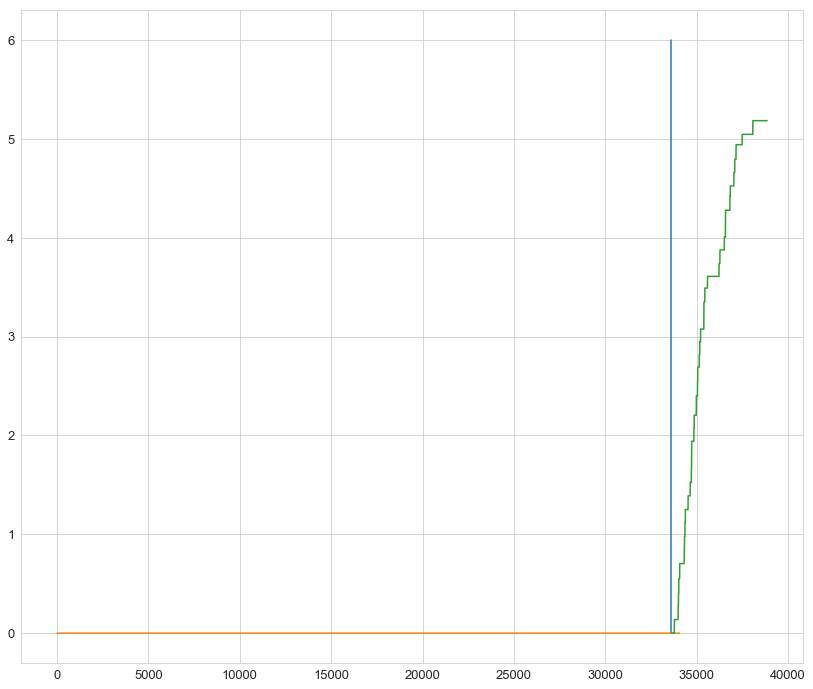

In [453]:
plt.plot([33609 for _ in range(350)], np.linspace(0, 6, 350))
plt.plot(result_with_less_train_data[result_with_less_train_data>0.5].sum(axis=1))
plt.plot(result_with_less_train_test.sum(axis=1))

1437839629.140311

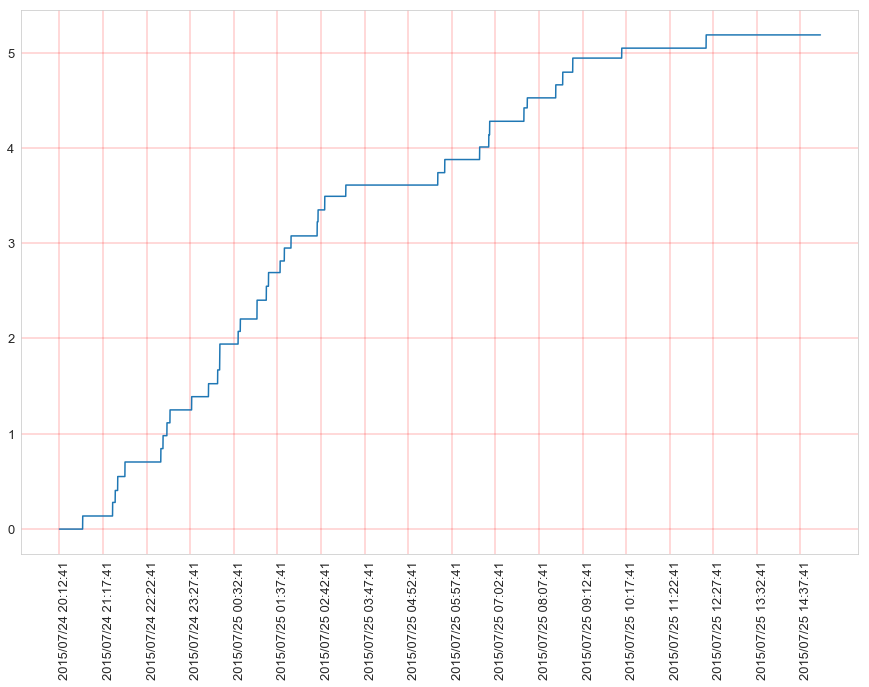

In [458]:
from datetime import datetime
import pytz
result_with_less_train_data = pd.read_csv("D://SIAT_IT_Security/result_of_my_work_first_15_strange_valid.csv", index_col="Time")
result_with_less_train_test = pd.read_csv("D://SIAT_IT_Security/result_of_my_work_first_15_strange_test.csv", index_col="Time")
fig = plt.figure(figsize=(15, 10))
def draw_full_chart(an_scores, interval_for_labels = 300):

    labels = [datetime.fromtimestamp(int(str(t)[:10]),pytz.timezone('Europe/Berlin')).strftime("%Y/%m/%d %H:%M:%S") for t in an_scores.index]
    x = range(len(an_scores))
    plt.plot(x, an_scores)
    plt.xticks(x[::interval_for_labels],labels[::interval_for_labels], rotation=90, rotation_mode='anchor', horizontalalignment ='right')
    plt.grid(color='r', linestyle='-', linewidth=0.3)
    return

resik = result_with_less_train_test.sum(axis=1)
# df_1 = df_big.loc[33612:]['code_204']
# df_1.index = res.index
resik.index = [1437761561 + 13* timestamp for timestamp in range(len(resik))]
# res = result_with_less_train_test[result_with_less_train_test>0.5].sum(axis=1)
# res.index = [resik.index[-1] + timestamp for timestamp in range(len(res))]
# draw_full_chart(res)
# draw_full_chart(pd.Series(0))
draw_full_chart(resik)
# print(resik.index[-1], res.index[1])
# plt.plot(res)
# draw_full_chart(resik)
# plt.plot(resik)
plt.savefig("D://")
test_new["timestamp"][0]

# new_data

In [173]:
df1_1 = pd.read_csv("D://SIAT_IT_Security/normal_data_1.txt", sep='\t')
df1_2 = pd.read_csv("D://SIAT_IT_Security/normal_data_2.txt", sep='\t')

In [174]:

df1_1 = work_with_timestamp(df1_1)
df1_1 = work_with_strange_attribute(df1_1)
df1_1 = processing_http_status(df1_1)
df1_1 = fill_nan_values(df1_1)
df1_1_support = result_recognition(df1_1)
df1_1 = processing_url(df1_1)
df1_1 = methods_post_get_and_ip(df1_1)
df1_1 = mime_type(df1_1)
df1_1.columns

Index(['timestamp', 's-port', 'sc-http-status', 'sc-bytes', 'sc-header-bytes',
       'c-port', 'cs-bytes', 'cs-header-bytes', 'cs-method', 'cs-url', 's-ip',
       'c-ip', 'connection.time', 'request.time', 'response.time',
       'close.time', 'idle.time0', 'idle.time1', 'cs-mime-type', 'cs(Referer)',
       'cs(User-Agent)', 'len_of_url', 'code_200_206', 'code_204', 'code_3xx',
       'code_4xx_5xx', 'url_liverail', 'url_avertisement', 'stranger', 'caps',
       'get-method', 'post-method', 'a_class', 'b_class', 'c_class',
       'mime_application', 'mime_text', 'mime_image'],
      dtype='object')

In [175]:

df1_2 = work_with_timestamp(df1_2)
df1_2 = work_with_strange_attribute(df1_2)
df1_2 = processing_http_status(df1_2)
df1_2 = fill_nan_values(df1_2)
df1_2_support = result_recognition(df1_2)
df1_2 = processing_url(df1_2)
df1_2 = methods_post_get_and_ip(df1_2)
df1_2 = mime_type(df1_2)
df1_2.columns

Index(['timestamp', 's-port', 'sc-http-status', 'sc-bytes', 'sc-header-bytes',
       'c-port', 'cs-bytes', 'cs-header-bytes', 'cs-method', 'cs-url', 's-ip',
       'c-ip', 'connection.time', 'request.time', 'response.time',
       'close.time', 'idle.time0', 'idle.time1', 'cs-mime-type', 'cs(Referer)',
       'cs(User-Agent)', 'len_of_url', 'code_200_206', 'code_204', 'code_3xx',
       'code_4xx_5xx', 'url_liverail', 'url_avertisement', 'stranger', 'caps',
       'get-method', 'post-method', 'a_class', 'b_class', 'c_class',
       'mime_application', 'mime_text', 'mime_image'],
      dtype='object')

In [176]:
df1_1.columns

Index(['timestamp', 's-port', 'sc-http-status', 'sc-bytes', 'sc-header-bytes',
       'c-port', 'cs-bytes', 'cs-header-bytes', 'cs-method', 'cs-url', 's-ip',
       'c-ip', 'connection.time', 'request.time', 'response.time',
       'close.time', 'idle.time0', 'idle.time1', 'cs-mime-type', 'cs(Referer)',
       'cs(User-Agent)', 'len_of_url', 'code_200_206', 'code_204', 'code_3xx',
       'code_4xx_5xx', 'url_liverail', 'url_avertisement', 'stranger', 'caps',
       'get-method', 'post-method', 'a_class', 'b_class', 'c_class',
       'mime_application', 'mime_text', 'mime_image'],
      dtype='object')

In [177]:
df1_1 = df1_1[df1_1['cs-url']!='http://--']
df1_1 = df1_1.reset_index(drop=True)
df1_2 = df1_2[df1_2['cs-url']!='http://--']
df1_2 = df1_2.reset_index(drop=True)

In [178]:
# most_of_us = Counter(df1_1["cs(User-Agent)"]).most_common()[:5]
# print(most_of_us)
# most_of_us = np.array(most_of_us)[:, :1].reshape(5,)
# def do_column(check_string, series):
#     init = 0
#     init_array = []
#     for i in series:
#         init += 1 if check_string in str(i) else 0
#         init_array.append(init)
#     return init_array
# encode = {"user-agent " + str(i): j for i, j in enumerate(most_of_us)}
# for i in range(5):
#     df1_1['user-agent {}'.format(i)] = do_column(encode["user-agent {}".format(i)], df1_1['cs(User-Agent)'])

In [180]:
df1_1.drop(columns='cs-mime-type', inplace=True)
df1_2.drop(columns='cs-mime-type', inplace=True)

In [181]:
df1_1['user-agent 0'] = 0
df1_1['user-agent 1'] = 0
df1_1['user-agent 2'] = 0
df1_1['user-agent 3'] = 0
df1_1['user-agent 4'] = 0
df1_2['user-agent 0'] = 0
df1_2['user-agent 1'] = 0
df1_2['user-agent 2'] = 0
df1_2['user-agent 3'] = 0
df1_2['user-agent 4'] = 0

In [182]:
def save(df):
    file = df.reset_index(drop=True)
    df1 = df.drop(columns=['cs-url'])
    df1.to_csv("D://a.csv")
    df1 = pd.read_csv("D://a.csv")
    df1['c-port'] = df1['c-port'].astype(float)
    df1["cs-bytes"] = df1['cs-bytes'].astype(float)
    df1["cs-header-bytes"] = df1['cs-header-bytes'].astype(float)
    # file1.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)
    df1['timestamp'] = df1['Unnamed: 0']
    df1.drop(columns=["user-agent 0", 'Unnamed: 0', 'user-agent 0'], inplace=True)
    # file1['user-agent 3'][:447] = [0 for i in range(447)]
    # # file1['user-agent 3'][200] = 1
#     df1[447:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
#     df1[:447].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
#     # noise = np.random.normal(0,1,100)
    # file1 = file
    return df1

In [183]:
df1_1 = save(df1_1)
df1_2 = save(df1_2)

In [97]:
df1_file1 = np.vstack([df1_array, file1_array, df1_1, df1_2])

df1_file1 = pd.DataFrame(df1_file1, columns=df1.columns)
df1_file1.reset_index(drop=True, inplace=True)
df1_file1['timestamp'] = df1_file1.index

In [644]:
df1_1 = pd.read_csv("D://SIAT_IT_Security/normal_data_1.txt", sep='\t')
df1_2 = pd.read_csv("D://SIAT_IT_Security/normal_data_2.txt", sep='\t')
df = pd.read_csv("D://SIAT_IT_Security/normal_data.txt", sep='\t')
a = pd.read_csv("D://SIAT_IT_Security/anomaly.txt", sep='\t')
df1_3 = pd.read_csv("D://SIAT_IT_Security/normal_data_3.txt", sep='\t')
validation = pd.read_csv("D://SIAT_IT_Security/validate.txt", sep='\t')


df1_file1 = np.vstack([df, df1_1, df1_2, df1_3, validation, test])
df1_file1 = pd.DataFrame(df1_file1, columns=df.columns)
df1_file1.reset_index(drop=True, inplace=True)
df1_file1['timestamp'] = df1_file1.index

In [646]:
df1_file1 = work_with_timestamp(df1_file1)
print(df1_file1.shape)
df1_file1.dropna(subset=["cs-url"], inplace=True)
df1_file1 = work_with_strange_attribute(df1_file1)
print(df1_file1.shape)
df1_file1 = processing_http_status(df1_file1)
print(df1_file1.shape)
df1_file1 = fill_nan_values(df1_file1)
print(df1_file1.shape)
df1_file1_support = result_recognition(df1_file1)
print(df1_file1.shape)
df1_file1 = processing_url(df1_file1)
df1_file1 = methods_post_get_and_ip(df1_file1)
df1_file1 = mime_type(df1_file1)
df1_file1['timestamp'] = df1_file1.index

(24917, 21)
(20076, 22)
(20076, 26)
(20076, 26)
(20076, 26)


In [647]:
for i, j in enumerate(df1_file1['cs-url']):
    try:
        len(j)
    except:
        print(i)

In [648]:
df1_file1 = df1_file1.reset_index(drop=True)
df1_file1 = df1_file1[df1_file1['cs-url']!='http://--']
df1_file1 = df1_file1.reset_index(drop=True)
df1_file1.shape

(20076, 38)

In [649]:
most_of_us = Counter(df1_file1["cs(User-Agent)"]).most_common()[:4]
print(most_of_us)
most_of_us = np.array(most_of_us)[:, :1].reshape(4,)
def do_column(check_string, series):
    init = 0
    init_array = []
    for i in series:
        init += 1 if check_string in str(i) else 0
        init_array.append(init)
    return init_array
encode = {"user-agent " + str(i): j for i, j in enumerate(most_of_us)}
for i in range(4):
    df1_file1['user-agent {}'.format(i)] = do_column(encode["user-agent {}".format(i)], df1_file1['cs(User-Agent)'])
df1_file1['user-agent 4'] = do_column('Mozilla/4.0 (compatible; MSIE 6.0; Nosibay Bubble Dock)3.0.705.0', df1_file1['cs(User-Agent)'])

[('Mozilla/5.0 (Windows NT 6.1; rv:53.0) Gecko/20100101 Firefox/53.0', 15528), ('Mozilla/5.0 (X11; Linux x86_64; rv:43.0) Gecko/20100101 Firefox/43.0 Iceweasel/43.0.4', 3205), ('Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36', 780), ('Microsoft BITS/7.5', 484)]


In [653]:
df1_file1 = drop_columns(df1_file1)

In [654]:
df1_file1.drop(columns='cs-mime-type', inplace=True)

In [655]:
def save(df):
    file = df.reset_index(drop=True)
    df1 = df.drop(columns=['cs-url'])
    df1.to_csv("D://a.csv")
    df1 = pd.read_csv("D://a.csv")
    df1['c-port'] = df1['c-port'].astype(float)
    df1["cs-bytes"] = df1['cs-bytes'].astype(float)
    df1["cs-header-bytes"] = df1['cs-header-bytes'].astype(float)
    # file1.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)
    df1['timestamp'] = df1['Unnamed: 0']
    df1.drop(columns=["user-agent 0", 'Unnamed: 0', 'user-agent 0'], inplace=True)
    # file1['user-agent 3'][:447] = [0 for i in range(447)]
    # # file1['user-agent 3'][200] = 1
#     df1[447:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
#     df1[:447].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
#     # noise = np.random.normal(0,1,100)
    # file1 = file
    return df1

In [656]:
df1_file1 = save(df1_file1)

In [651]:
df1_file1['timestamp'] = df1_file1.index

In [664]:
# df1_file1.drop(columns=["a_class", 'b_class', "c_class"], inplace=True)
# df1_file1.drop(columns='code_4xx_5xx', inplace=True)
# df1_file1.drop(columns=['code_200_206', 'code_204'], inplace=True)
# df1_file1.drop(columns=['url_avertisement'], inplace=True)
df1_file1.loc[:18000].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
df1_file1.loc[20049:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
df1_file1.loc[18000:20049].to_csv("D://SIAT_IT_Security/validation.csv", index=False)
df1_file1.head()

,timestamp,sc-bytes,sc-header-bytes,c-port,cs-bytes,cs-header-bytes,connection.time,request.time,response.time,close.time,idle.time0,idle.time1,len_of_url,code_3xx,url_liverail,stranger,caps,get-method,post-method,a_class,b_class,c_class,mime_application,mime_text,mime_image,user-agent 1,user-agent 2,user-agent 3,user-agent 4
0,0,249.0,14.0,49162.0,97.0,0.0,0.153068,0.0,0.119275,0.003393,0.000586,0.003393,32,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,1,2188.0,1763.0,49181.0,423.0,83.0,0.184776,0.0,0.151731,0.000526,0.001997,0.001226,20,0,0,0,0,1,1,2,0,0,1,1,0,0,0,0,0
2,2,419.0,471.0,49183.0,428.0,83.0,0.175287,0.0,0.217867,0.000526,0.002921,0.000526,25,0,0,0,0,1,2,3,0,0,2,1,0,0,0,0,0
3,3,419.0,471.0,49184.0,428.0,83.0,0.185377,0.0,0.252087,0.000525,0.001972,0.000525,25,0,0,0,0,1,3,4,0,0,3,1,0,0,0,0,0
4,4,419.0,471.0,49185.0,428.0,83.0,0.238860,0.0,0.296810,0.000722,0.003716,0.000722,25,0,0,0,0,1,4,5,0,0,4,1,0,0,0,0,0


In [595]:
# for i in df1_file1.columns:
#     if np.all(df1_file1[i].loc[:18000] == 0):
# #         print(file[i][100+10*j])
#         df1_file1[i][100]=1
#         print(df1_file1[i][100], i, j)
# # Counter(df1_file1['url_liverail'][:])

C:\Users\aldz0719\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1 url_liverail http://wt.o.nytimes.com/dcsa5pgfq10000c9zuysqk0lm_6i8y/dcs.gif?&dcsdat=1437934246938&dcssip=www.nytimes.com&dcsuri=/video/ebola-soccer-homepage-promo/Audio.html&dcsre
1 stranger http://wt.o.nytimes.com/dcsa5pgfq10000c9zuysqk0lm_6i8y/dcs.gif?&dcsdat=1437934246938&dcssip=www.nytimes.com&dcsuri=/video/ebola-soccer-homepage-promo/Audio.html&dcsre
1 user-agent 1 http://wt.o.nytimes.com/dcsa5pgfq10000c9zuysqk0lm_6i8y/dcs.gif?&dcsdat=1437934246938&dcssip=www.nytimes.com&dcsuri=/video/ebola-soccer-homepage-promo/Audio.html&dcsre
1 user-agent 4 http://wt.o.nytimes.com/dcsa5pgfq10000c9zuysqk0lm_6i8y/dcs.gif?&dcsdat=1437934246938&dcssip=www.nytimes.com&dcsuri=/video/ebola-soccer-homepage-promo/Audio.html&dcsre


In [611]:
df1_file1['url_liverail'].loc[100]=0
df1_file1['user-agent 1'].loc[100]=0

In [643]:
test = pd.read_csv("D://SIAT_IT_Security/smth_new.txt", sep='\t')

# new part

In [460]:
df1_1 = pd.read_csv("D://SIAT_IT_Security/normal_data_1.txt", sep='\t')
df1_2 = pd.read_csv("D://SIAT_IT_Security/normal_data_2.txt", sep='\t')
df = pd.read_csv("D://SIAT_IT_Security/normal_data.txt", sep='\t')
df1_4 = pd.read_csv("D://SIAT_IT_Security/normal_data_4.txt", sep='|')
df1_3 = pd.read_csv("D://SIAT_IT_Security/normal_data_3.txt", sep='\t')
df1_5 = pd.read_csv("D://SIAT_IT_Security/normal_data_5.txt", sep='\t')
df1_6 = pd.read_csv("D://SIAT_IT_Security/normal_data_6.txt", sep='\t')
validation = pd.read_csv("D://SIAT_IT_Security/validate.txt", sep='\t')
test = pd.read_csv("D://SIAT_IT_Security/anomka.txt", sep='\t')
# test.drop(columns='x-elapsed-time', inplace=True)
df_big = pd.DataFrame(np.vstack([df, df1_1, df1_2, df1_3, df1_4, df1_6, df1_5, validation, test]), columns=df.columns)

In [428]:
test.columns, df.columns

(Index(['timestamp', 's-port', 'sc-http-status', 'sc-bytes', 'sc-header-bytes',
        'c-port', 'cs-bytes', 'cs-header-bytes', 'cs-method', 'cs-url', 's-ip',
        'c-ip', 'connection.time', 'request.time', 'response.time',
        'close.time', 'idle.time0', 'idle.time1', 'cs-mime-type', 'cs(Referer)',
        'cs(User-Agent)'],
       dtype='object'),
 Index(['timestamp', 's-port', 'sc-http-status', 'sc-bytes', 'sc-header-bytes',
        'c-port', 'cs-bytes', 'cs-header-bytes', 'cs-method', 'cs-url', 's-ip',
        'c-ip', 'connection.time', 'request.time', 'response.time',
        'close.time', 'idle.time0', 'idle.time1', 'cs-mime-type', 'cs(Referer)',
        'cs(User-Agent)'],
       dtype='object'))

In [430]:
df_big = work_with_timestamp(df_big)
print(df_big.shape)
df_big.dropna(subset=["cs-url"], inplace=True)
df_big = work_with_strange_attribute(df_big)
print(df_big.shape)
df_big = processing_http_status(df_big)
print(df_big.shape)
df_big = fill_nan_values(df_big)
print(df_big.shape)
df_big_support = result_recognition(df_big)
print(df_big.shape)
df_big = processing_url(df_big)
df_big = methods_post_get_and_ip(df_big)
df_big = mime_type(df_big)
df_big['timestamp'] = df_big.index

(46696, 21)
(38850, 22)
(38850, 26)
(38850, 26)
(38850, 26)


In [431]:
df_big = df_big.reset_index(drop=True)
df_big = df_big[df_big['cs-url']!='http://--']
df_big = df_big.reset_index(drop=True)
df_big.shape

(38850, 38)

In [432]:
most_of_us = Counter(df_big["cs(User-Agent)"]).most_common()[:4]
print(most_of_us)
most_of_us = np.array(most_of_us)[:, :1].reshape(4,)
def do_column(check_string, series):
    init = 0
    init_array = []
    for i in series:
        init += 1 if check_string in str(i) else 0
        init_array.append(init)
    return init_array
encode = {"user-agent " + str(i): j for i, j in enumerate(most_of_us)}
for i in range(4):
    df_big['user-agent {}'.format(i)] = do_column(encode["user-agent {}".format(i)], df_big['cs(User-Agent)'])
df_big['user-agent 4'] = do_column('Mozilla/4.0 (compatible; MSIE 6.0; Nosibay Bubble Dock)3.0.705.0', df_big['cs(User-Agent)'])

[('Mozilla/5.0 (Windows NT 6.1; rv:53.0) Gecko/20100101 Firefox/53.0', 17487), ('Mozilla/5.0 (X11; Linux x86_64; rv:43.0) Gecko/20100101 Firefox/43.0 Iceweasel/43.0.4', 11636), ('Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.2; Trident/6.0)', 5241), ('Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36', 3147)]


In [433]:
df_big.drop(columns='cs-mime-type', inplace=True)
df_big = drop_columns(df_big)

In [434]:
def save(df):
    file = df.reset_index(drop=True)
    df1 = df.drop(columns=['cs-url'])
    df1.to_csv("D://a.csv")
    df1 = pd.read_csv("D://a.csv")
    df1['c-port'] = df1['c-port'].astype(float)
    df1["cs-bytes"] = df1['cs-bytes'].astype(float)
    df1["cs-header-bytes"] = df1['cs-header-bytes'].astype(float)
    # file1.drop(columns=["Unnamed: 0", 'Unnamed: 0.1'], inplace=True)
    df1['timestamp'] = df1['Unnamed: 0']
    df1.drop(columns=['Unnamed: 0'], inplace=True)
    # file1['user-agent 3'][:447] = [0 for i in range(447)]
    # # file1['user-agent 3'][200] = 1
#     df1[447:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
#     df1[:447].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
#     # noise = np.random.normal(0,1,100)
    # file1 = file
    return df1

In [445]:
# df_big.drop(columns='url_avertisement', inplace=True)
# df_big.drop(columns='url_liverail', inplace=True)
# df_big.drop(columns='post-method', inplace=True)
df_big.loc[:33609].to_csv("D://SIAT_IT_Security/trainData.csv", index=False)
df_big.loc[33609:].to_csv("D://SIAT_IT_Security/testData.csv", index=False)
df_big.loc[29538:33609].to_csv("D://SIAT_IT_Security/validation.csv", index=False)
# [29538:33608] validation [33609:] test

In [423]:
33609-29538

4071

In [406]:
for i, j in enumerate(df_big.loc[33609:]['cs-url']):
    if "cisco" in j:
        print(j)

In [471]:
df_big1 = df_big[['timestamp', 'c-port']].copy()